<a href="https://colab.research.google.com/github/shumyyla/test/blob/master/graph.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import requests 
from bs4 import BeautifulSoup
wikiurl='https://en.wikipedia.org/wiki/List_of_countries_by_carbon_dioxide_emissions'
table_class='wikitable sortable jquery-tablesorter'

response=requests.get(wikiurl)
#status 200: The server successfully answered the http request 
print(response.status_code)

200


In [4]:
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find('table',{'class':"wikitable"})

df2018 = pd.read_html(str(table))[0]
df2018

Country[20] Fossil CO2 emissions(Mt CO2)             \
                        Country[20]                         1990       2005   
0                             World                    22674.116  30049.809   
1    World – International Aviation                      258.941    422.777   
2    World – International Shipping                      371.804    572.169   
3                       Afghanistan                        2.546      1.063   
4                           Albania                        6.583      4.196   
..                              ...                          ...        ...   
207                         Vietnam                       20.182     99.231   
208                  Western Sahara                        0.144      0.227   
209                           Yemen                        6.887     21.768   
210                          Zambia                        2.955      2.457   
211                        Zimbabwe                       17.178     11.388   

               Fossil CO2 emissions                           \
          2017     2017(% of world) 2017 vs 1990: change (%)   
0    37077.404              100.00%                    63.5%   
1      543.381                1.47%                   109.8%   
2      677.248                1.83%                    82.2%   
3       11.422                0.03%                   348.6%   
4        5.026                0.01%                   -23.7%   
..         ...                  ...                      ...   
207    218.729                0.59%                   983.8%   
208      0.276                0.00%                    91.7%   
209     12.503                0.03%                    81.5%   
210      4.967                0.01%                    68.1%   
211     12.087                0.03%                   -29.6%   

    2017 – Fossil CO2 emissions                           \
    Per land area(t CO2/km2/yr) Per capita(t CO2/cap/yr)   
0                          73.0                      4.9   
1                           NaN                      NaN   
2                           NaN                      NaN   
3                          18.0                      0.3   
4                         175.0                      1.7   
..                          ...                      ...   
207                       660.0                      2.3   
208                         1.0                      0.5   
209                        24.0                      0.4   
210                         7.0                      0.3   
211                        31.0                      0.7   

      2018 CO2 emissions[21]                           
    Total including LUCF[22] Total excluding LUCF[23]  
0                   36431.11                 35247.21  
1                        NaN                      NaN  
2                        NaN                      NaN  
3                       7.59                     7.44  
4                       5.32                     5.56  
..                       ...                      ...  
207                   245.36                   257.86  
208                      NaN                      NaN  
209                     9.31                     9.31  
210                    40.47                     7.74  
211                    99.43                    12.27  

[212 rows x 10 columns]

In [6]:
#get lists of data
emi_ = df2018[('2018 CO2 emissions[21]', 'Total excluding LUCF[23]')]
country_ = list(df2018[('Country[20]', 'Country[20]')])
country_mod = [i.replace('\xa0',' ') for i in country_]

#create a DataFrame
df = pd.DataFrame(zip(country_mod,emi_), columns = ['countries', 'emission_2018'])

#remove the row of country that cannot be converted
df = df[df['countries']!='Serbia & Montenegro']  
df.iloc[:,1] = df.iloc[:,1].astype('float')
df = df[(df['emission_2018']>200) & (df['emission_2018']<1000)]
df['percentage'] = [i*100/sum(df['emission_2018']) for i in df['emission_2018']]
df.head(9)

,countries,emission_2018,percentage
12,Australia,386.62,4.310188
28,Brazil,427.71,4.768275
36,Canada,574.40,6.403632
60,Egypt,246.26,2.745401
72,France Monaco,309.96,3.455553
77,Germany,709.54,7.910224
94,Indonesia,583.11,6.500734
95,Iran,629.29,7.015566
99,Italy San Marino Vatican City,324.85,3.621553


In [7]:
df_s = df.sort_values(by='emission_2018', ascending=False)
df_s.head(9)

,countries,emission_2018,percentage
77,Germany,709.54,7.910224
178,South Korea,630.87,7.033181
95,Iran,629.29,7.015566
94,Indonesia,583.11,6.500734
36,Canada,574.40,6.403632
167,Saudi Arabia,514.60,5.736958
127,Mexico,472.14,5.263598
177,South Africa,433.25,4.830037
28,Brazil,427.71,4.768275


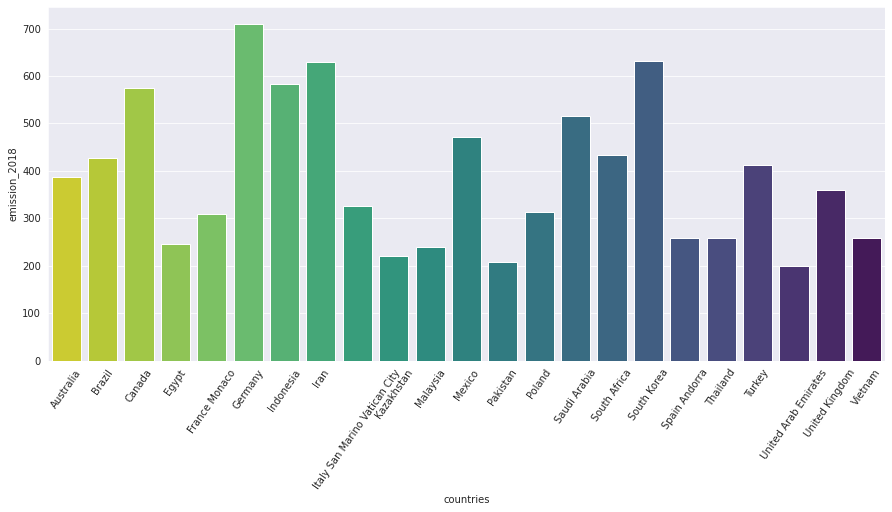

In [14]:
plt.figure(figsize=(15,6.5))
sns.set_style('darkgrid')
g = sns.barplot(data=df, x='countries', y='emission_2018',
                ci=False, palette='viridis_r')
g.set_xticklabels(df['countries'], rotation=55, fontdict={'fontsize':10})
plt.show()

In [9]:
def get_color(name, number):
    pal = list(sns.color_palette(palette=name, n_colors=number).as_hex())
    return pal

In [10]:
pal_vi = get_color('viridis_r', len(df))
pal_plas = get_color('plasma_r', len(df))
pal_spec = get_color('Spectral', len(df))
pal_hsv = get_color('hsv', len(df))

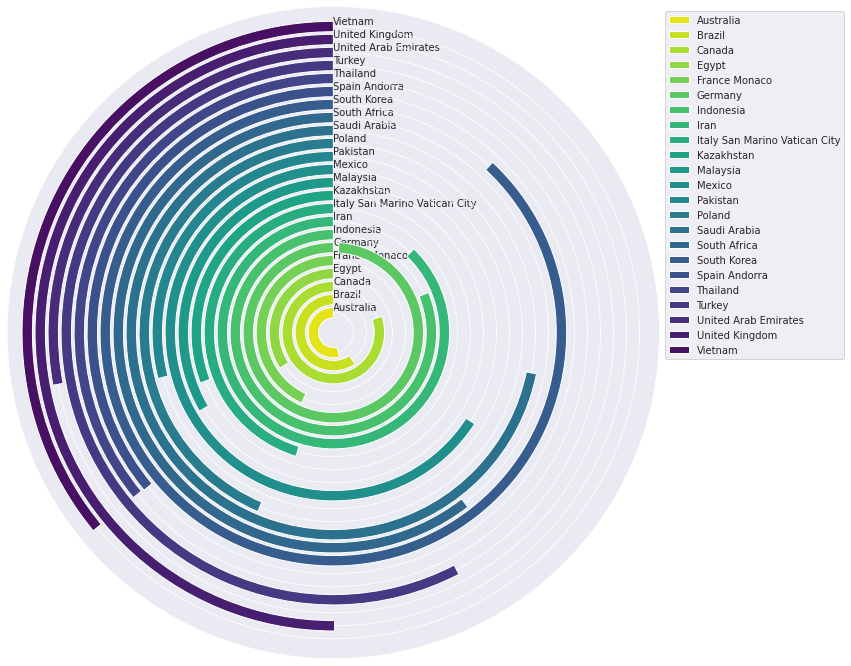

In [17]:
import math
plt.gcf().set_size_inches(12, 12)
sns.set_style('darkgrid')

#set max value
max_val = max(df['emission_2018'])*1.01
ax = plt.subplot(projection='polar')

#set the subplot 
ax.set_theta_zero_location('N')
ax.set_theta_direction(1)
ax.set_rlabel_position(0)
ax.set_thetagrids([], labels=[])
ax.set_rgrids(range(len(df)), labels= df['countries'])

#set the projection
ax = plt.subplot(projection='polar')

for i in range(len(df)):
    ax.barh(i, list(df['emission_2018'])[i]*2*np.pi/max_val,
            label=list(df['countries'])[i], color=pal_vi[i])

plt.legend(bbox_to_anchor=(1, 1), loc=2)
plt.show()